In [21]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib.cm as cm
import Image
from os.path import split
%matplotlib inline
import sys
sys.path.insert(0, 'caffe/python/')
import caffe
caffe.set_mode_gpu()
caffe.set_device(0)

In [2]:
imgfn = 'data/HED-BSDS/test/100039.jpg'
img = Image.open(imgfn)
imgshow = np.array(img)
img = np.array(img, dtype=np.float32)
img = img[:,:,::-1]
img -= np.array((104.00698793,116.66876762,122.67891434))
img = img.transpose((2,0,1))

## Fused Edge and Side-outputs

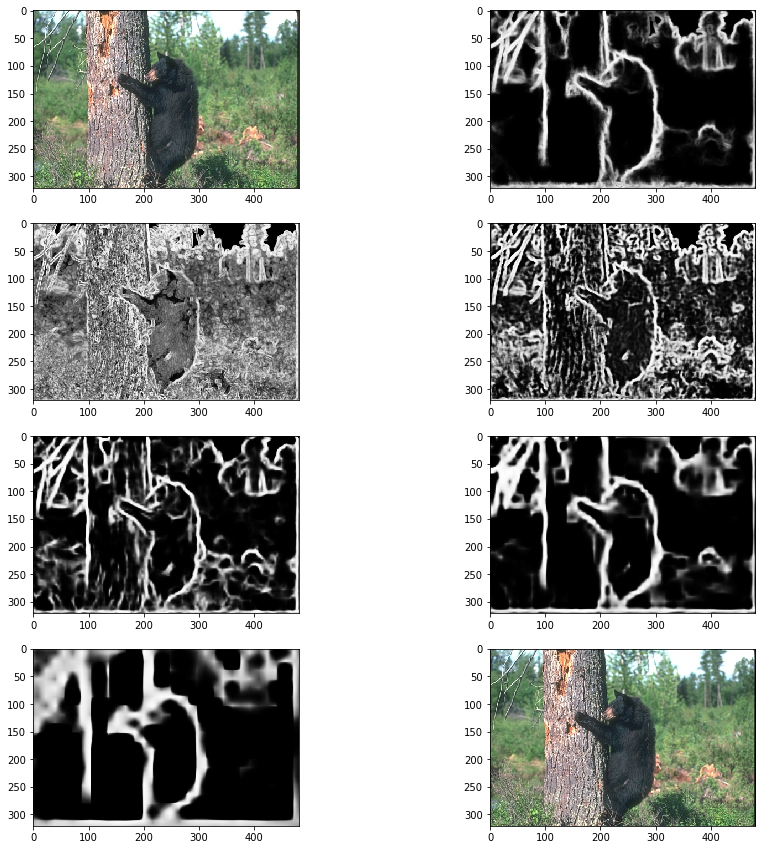

In [36]:
net = caffe.Net('model/hed_test.pt','snapshot/hed_pretrained_bsds.caffemodel', caffe.TEST)
# net = caffe.Net('model/fsds_old_test.prototxt','/home/kai/Models/sk506_it14k.caffemodel', caffe.TEST)
net.blobs['data'].reshape(1, *img.shape)
net.blobs['data'].data[...] = img
pred = net.forward()
fuse = np.squeeze(pred['sigmoid_fuse'])
fig, axarr = plt.subplots(4,2, figsize=(15,15))
axarr[0,0].imshow(imgshow)
axarr[0,1].imshow(fuse, cmap=cm.Greys_r)
axarr[1,0].imshow(np.squeeze(pred['sigmoid_dsn1']), cmap=cm.Greys_r)
axarr[1,1].imshow(np.squeeze(pred['sigmoid_dsn2']), cmap=cm.Greys_r)
axarr[2,0].imshow(np.squeeze(pred['sigmoid_dsn3']), cmap=cm.Greys_r)
axarr[2,1].imshow(np.squeeze(pred['sigmoid_dsn4']), cmap=cm.Greys_r)
axarr[3,0].imshow(np.squeeze(pred['sigmoid_dsn5']), cmap=cm.Greys_r)
axarr[3,1].imshow(imgshow)
fig.savefig(split(imgfn)[1])

# Show internals
## 1. Print convolutional parameters' mean and std

In [37]:
for p in net.params:
    if 'conv' in p and 'split' not in p:
        print "layer %s weight mean=%.6f, std=%.6f"%(p, net.params[p][0].data.mean(), net.params[p][0].data.std())

layer conv1_1 weight mean=-0.001241, std=0.184458
layer conv1_2 weight mean=-0.002065, std=0.037653
layer conv2_1 weight mean=-0.002920, std=0.032326
layer conv2_2 weight mean=-0.002795, std=0.023668
layer conv3_1 weight mean=-0.000744, std=0.017567
layer conv3_2 weight mean=-0.000561, std=0.012488
layer conv3_3 weight mean=-0.000957, std=0.012800
layer conv4_1 weight mean=-0.000400, std=0.010174
layer conv4_2 weight mean=-0.000376, std=0.007713
layer conv4_3 weight mean=-0.000750, std=0.008033
layer conv5_1 weight mean=-0.001738, std=0.016308
layer conv5_2 weight mean=-0.001265, std=0.012577
layer conv5_3 weight mean=-0.000845, std=0.010234


## 2. Print intermediate blobs

In [38]:
for b in net.blobs:
    if 'conv' in b and 'split' not in b:
        print "Blob %s data mean=%.6f, diff mean=%.6f"%(b, net.blobs[b].data.mean(), net.blobs[b].diff.mean())

Blob conv1_1 data mean=17.370510, diff mean=0.000000
Blob conv1_2 data mean=37.444973, diff mean=0.000000
Blob conv2_1 data mean=30.679638, diff mean=0.000000
Blob conv2_2 data mean=17.316799, diff mean=0.000000
Blob conv3_1 data mean=18.832268, diff mean=0.000000
Blob conv3_2 data mean=17.398991, diff mean=0.000000
Blob conv3_3 data mean=7.589932, diff mean=0.000000
Blob conv4_1 data mean=10.522153, diff mean=0.000000
Blob conv4_2 data mean=7.629281, diff mean=0.000000
Blob conv4_3 data mean=2.000475, diff mean=0.000000
Blob conv5_1 data mean=2.288268, diff mean=0.000000
Blob conv5_2 data mean=2.387209, diff mean=0.000000
Blob conv5_3 data mean=4.779512, diff mean=0.000000
